In [8]:
from tqdm.notebook import tqdm
tqdm.pandas()
import os
import pandas as pd
import tensorflow as tf

In [9]:
raw = pd.read_csv("./minwook_data.csv") 
raw['class'] -= 1
raw.loc[raw['class'] == -1, 'class'] = 4
raw.sample(10)

,class,text
901,1,저기요 제가 지금 차비가 없는데요 그래서 뭐요 돈좀 5만원만 주지? 저 돈 없어요 ...
1012,2,안녕히가세요 사장님 야 너 내가 나가니까 일 없어서 좋지 그치 네? 아니에요 사장님...
4549,4,요즘 월세 얼마 정도 받는지 알아?\n월세는 기본 40만원 50만원에 보증금 500...
2011,0,뭐하자는 거야? 죄송합니다. 뭐가 죄송해? 말해봐 뭐가 죄송해? 죄송합니다. 죄송할...
5562,4,추석 때 외식을 해야 할까?\n한번은 해야 하지 않을까?\n뭐 먹으러 갈까?\n오랜...
246,3,저기요 사장님 밥에서 머릿카락이 나왔어요 아 죄송합니다 실수로 조리하다 들어간거 같...
3349,2,저 다음주 월금 휴가 좀 쓰겠습니다. 씨 무슨일 있어? 가족끼리 계획한 여행일정이 ...
3347,2,요즘 서울대 물리학과 나오면 무슨일해? 회사도 다니고 교육쪽 일도 하죠. 그래 애인...
3606,4,주위에 해군 나온 사람은 없낭?\n내 주위에는 없다 ㅠ\n해군 나온 사람들은 물고기...
3883,4,블랙핑크 ** 팔로워 봤어?\n아니 ** 팔로워가 어떤데?\n팔로워 수가 무려 5천...


In [10]:
raw[raw['class']==4].shape

(3293, 2)

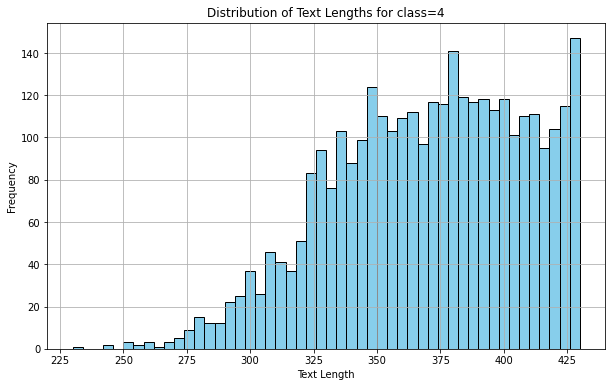

In [50]:
import matplotlib.pyplot as plt

# 'class' 값이 4인 행들을 선택하여 'text' 열을 추출
texts_class_4 = raw.loc[raw['class'] == 4, 'text']

# 각 텍스트의 길이를 구해서 리스트에 저장
text_lengths = texts_class_4.apply(len)

# 길이 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths for class=4')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [51]:
# print(raw.shape)
# class4_df = raw[raw['class'] == 4]
# class4_df['text_len'] = class4_df['text'].str.len()

# # 'value' 열 기준으로 오름차순 정렬합니다.
# class4_df = class4_df.sort_values(by='text_len', ascending=True)

# # 상위 1000개 행만 추출합니다.
# top1000_class4_df = class4_df.head(1000)
# not_class4_df = raw[raw['class'] != 4]
# not_class4_df = not_class4_df.loc[~not_class4_df.index.isin(top1000_class4_df.index)]
# df = pd.concat([top1000_class4_df, not_class4_df], ignore_index=True)

# print(df.shape)

(6820, 2)
(4527, 3)


/tmp/ipykernel_1946/2860957776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class4_df['text_len'] = class4_df['text'].str.len()


In [52]:
df['text'].apply(len).max()

430

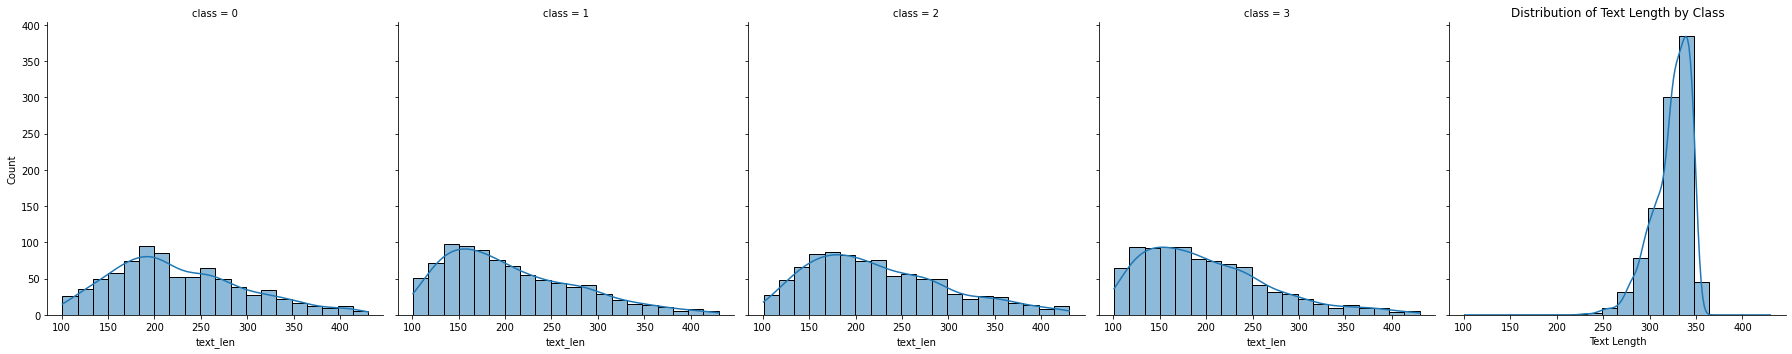

In [53]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 'text' 열의 길이를 계산하여 'text_len' 열을 추가합니다.
df['text_len'] = df['text'].str.len()

# seaborn displot을 사용하여 밀집도 그래프와 히스토그램을 동시에 그립니다.
sns.displot(
    x="text_len",
    col="class",
    data=df,
    kind="hist",
    kde=True,
    fill=True,
    legend=True
)

# x축 레이블 설정 (필요에 따라 조정하세요)
plt.xlabel("Text Length")

# y축 레이블 설정 (필요에 따라 조정하세요)
plt.ylabel("Density")

# 제목 설정 (필요에 따라 조정하세요)
plt.title("Distribution of Text Length by Class")

# 그래프 표시
plt.show()

In [24]:
# def duplicate_text(df):
#     # Create a copy of the DataFrame to avoid modifying the original
#     df_updated = df.copy()
  
#     # Conditionally modify 'text' column
#     condition = df_updated['class'] != 4
#     df_updated.loc[condition, 'text'] = df_updated[condition]['text'] * 3
  
#     return df_updated

# df_updated = duplicate_text(df)
# df = df_updated

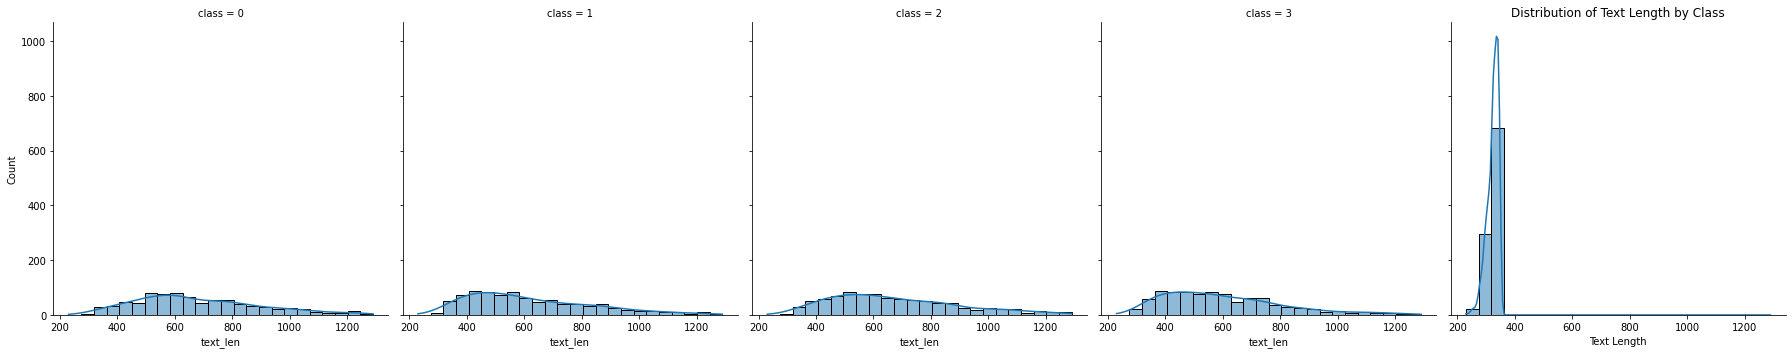

In [25]:
# import seaborn as sns
# import pandas as pd
# import matplotlib.pyplot as plt

# # 'text' 열의 길이를 계산하여 'text_len' 열을 추가합니다.
# df['text_len'] = df['text'].str.len()

# # seaborn displot을 사용하여 밀집도 그래프와 히스토그램을 동시에 그립니다.
# sns.displot(
#     x="text_len",
#     col="class",
#     data=df,
#     kind="hist",
#     kde=True,
#     fill=True,
#     legend=True
# )

# # x축 레이블 설정 (필요에 따라 조정하세요)
# plt.xlabel("Text Length")

# # y축 레이블 설정 (필요에 따라 조정하세요)
# plt.ylabel("Density")

# # 제목 설정 (필요에 따라 조정하세요)
# plt.title("Distribution of Text Length by Class")

# # 그래프 표시
# plt.show()

In [54]:
# df['text'] = df['text'].str.slice(0, 250)

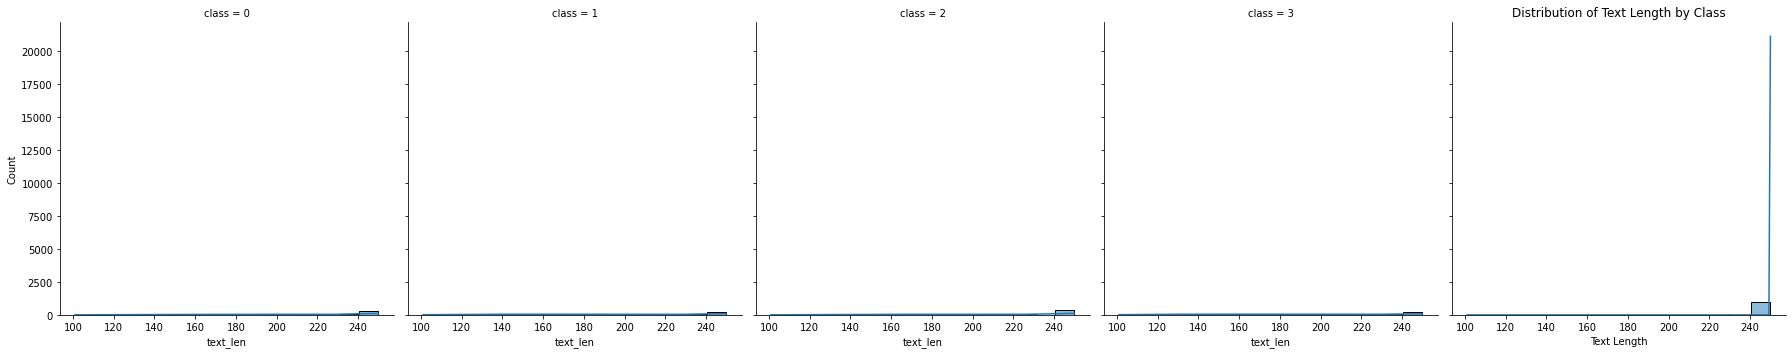

In [55]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 'text' 열의 길이를 계산하여 'text_len' 열을 추가합니다.
df['text_len'] = df['text'].str.len()

# seaborn displot을 사용하여 밀집도 그래프와 히스토그램을 동시에 그립니다.
sns.displot(
    x="text_len",
    col="class",
    data=df,
    kind="hist",
    kde=True,
    fill=True,
    legend=True
)

# x축 레이블 설정 (필요에 따라 조정하세요)
plt.xlabel("Text Length")

# y축 레이블 설정 (필요에 따라 조정하세요)
plt.ylabel("Density")

# 제목 설정 (필요에 따라 조정하세요)
plt.title("Distribution of Text Length by Class")

# 그래프 표시
plt.show()

In [11]:
# df = raw

In [12]:
from transformers import ElectraTokenizer

pretrained_model = "monologg/koelectra-small-v3-discriminator"
tokenizer = ElectraTokenizer.from_pretrained(pretrained_model)

df = df.replace(r'\\n', '', regex=True) # Delete [SEP]
assert df['text'].str.contains(r'\n').any() == False
tokenizer.decode(tokenizer.encode(df['text'][1090]))

'[CLS] 여기 음식이 왜이러죠 음식이 뭐가 문제인가요 손님 음식 맛이 이상하잖아요 저희는 메뉴얼대로 만들어서 손님 입맛에 안맞을수는 있습니다. 아 저는 한숟가락 밖에 안먹었으니 환불해주세요 손님 음식은 제대로 나왔기때문에 환불은 힘들거같습니다. 아니 한숟갈만 먹었는데 돈을 다내라고요? 네 손님 저희메뉴얼상 환불은 힘들거같습니다. 아니 뭐 이런 가게가 다있어. 여기 점장불러와 손님 죄송합니다 잠시만기다려주세요 [SEP]'

In [13]:
def convert_to_input(df, tokenizer, max_length):
    input_ids = []
    attention_masks = []
    labels = []

    for i in range(len(df)):
        sentence = df.iloc[i]['text'].replace('.', '')
        encoded = tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='tf'
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
        labels.append(df.iloc[i]['class'])

    input_ids = tf.concat(input_ids, axis=0)
    attention_masks = tf.concat(attention_masks, axis=0)
    labels = tf.convert_to_tensor(labels, dtype=tf.int32)

    return {
        'input_ids': input_ids,
        'attention_mask': attention_masks
    }, labels

In [14]:
from sklearn.model_selection import train_test_split

SEED = 1024
MAX_LENGTH = 430
BATCH_SIZE = 16

train_df, test_df = train_test_split(
    df, test_size = 0.2, random_state = SEED, stratify=df['class']
)
train_inputs, train_labels = convert_to_input(train_df, tokenizer, max_length=MAX_LENGTH)
test_inputs, test_labels = convert_to_input(test_df, tokenizer, max_length=MAX_LENGTH)
train_dataset = tf.data.Dataset.from_tensor_slices((train_inputs, train_labels)).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_inputs, test_labels)).batch(BATCH_SIZE)

In [15]:
import re
from sklearn.preprocessing import LabelEncoder
from transformers import TFElectraForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


MODEL_NAME = 'KoELECTRA_v3_small_single_without_dup'
MODEL_CHECK_POINT_PATH = f"{MODEL_NAME}.weights.h5"
MODEL_SAVE_PATH = os.path.join("_model", MODEL_NAME)


callback_earlystopping = EarlyStopping(
    monitor="val_accuracy", min_delta=0.001, patience=3
)

# lr 조절
callback_learningrate_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=5,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-6,
)


callback_modelcheckpoint = ModelCheckpoint(
    filepath=MODEL_CHECK_POINT_PATH,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only="True"
)
callbacks = [
    callback_earlystopping,
    callback_learningrate_scheduler,
    callback_modelcheckpoint,
]

EPOCHS = 50
# label index를 0부터 시작해주니까 문제 없이 처리됨, 이전에는 loss nan이 계속 나옴
label2id = {
    '협박 대화': 0,
    '갈취 대화': 1,
    '직장 내 괴롭힘 대화': 2,
    '기타 괴롭힘 대화': 3,
    '일반 대화': 4,
}
id2label = {v:k for k, v in label2id.items()}

# /device:GPU:0
with tf.device('/device:GPU:0'):
    model = TFElectraForSequenceClassification.from_pretrained(
        pretrained_model,
        num_labels=len(label2id),
        id2label=id2label, 
        label2id=label2id,
        from_pt=True,  # Load from PyTorch checkpoint
    )

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
    model.compile(
        optimizer=optimizer, 
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
        metrics=['accuracy']
    )
    history = model.fit(
        train_dataset, 
        epochs=EPOCHS, 
        validation_data=test_dataset,
        callbacks = callbacks,
    )

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'electra.embeddings.position_ids', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing TFElectraForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFElectraForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dens

Epoch 1/50
341/341 [==============================] - 147s 378ms/step - loss: 1.3416 - accuracy: 0.5464 - val_loss: 1.0055 - val_accuracy: 0.6158
Epoch 2/50
341/341 [==============================] - 127s 372ms/step - loss: 0.8844 - accuracy: 0.6288 - val_loss: 0.7832 - val_accuracy: 0.6158
Epoch 3/50
341/341 [==============================] - 127s 372ms/step - loss: 0.7689 - accuracy: 0.6591 - val_loss: 0.7238 - val_accuracy: 0.7170
Epoch 4/50
341/341 [==============================] - 127s 373ms/step - loss: 0.7049 - accuracy: 0.7225 - val_loss: 0.6512 - val_accuracy: 0.7405
Epoch 5/50
341/341 [==============================] - 127s 373ms/step - loss: 0.6272 - accuracy: 0.7691 - val_loss: 0.5707 - val_accuracy: 0.8006
Epoch 6/50
341/341 [==============================] - 127s 372ms/step - loss: 0.5458 - accuracy: 0.8098 - val_loss: 0.4897 - val_accuracy: 0.8519
Epoch 7/50
341/341 [==============================] - 127s 372ms/step - loss: 0.4792 - accuracy: 0.8405 - val_loss: 0.4304 -

In [16]:
if os.path.exists(MODEL_SAVE_PATH):
    print(f"{MODEL_SAVE_PATH} -- Folder already exists \n")
else:
    os.makedirs(MODEL_SAVE_PATH, exist_ok=True)
    print(f"{MODEL_SAVE_PATH} -- Folder create complete \n")

# save tokenizer, model
model.save_pretrained(MODEL_SAVE_PATH)
tokenizer.save_pretrained(MODEL_SAVE_PATH)

_model/KoELECTRA_v3_small_single_without_dup -- Folder already exists 



('_model/KoELECTRA_v3_small_single_without_dup/tokenizer_config.json',
 '_model/KoELECTRA_v3_small_single_without_dup/special_tokens_map.json',
 '_model/KoELECTRA_v3_small_single_without_dup/vocab.txt',
 '_model/KoELECTRA_v3_small_single_without_dup/added_tokens.json')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


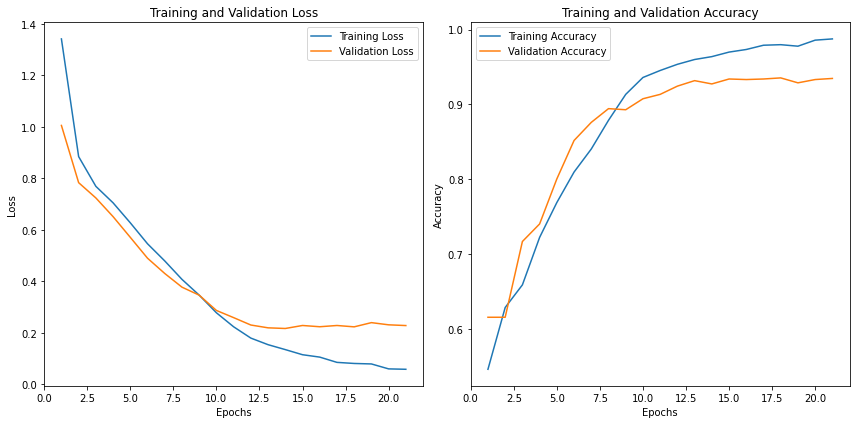

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 학습 기록 추출

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

# 손실 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x=epochs, y=loss, label='Training Loss')
sns.lineplot(x=epochs, y=val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 정확도 시각화
plt.subplot(1, 2, 2)
sns.lineplot(x=epochs, y=accuracy, label='Training Accuracy')
sns.lineplot(x=epochs, y=val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
import os
from transformers import AutoTokenizer, TFElectraForSequenceClassification

pretrained_model = "monologg/koelectra-small-v3-discriminator"

def model_path(model_name: str):
    return os.path.join("_model", model_name)

def load_model_for_inference(model_name, checkpoint_path):
    model = TFElectraForSequenceClassification.from_pretrained(model_path(model_name))
    model.load_weights(checkpoint_path)
    return model


tokenizer = AutoTokenizer.from_pretrained(model_path(MODEL_NAME))
model = load_model_for_inference(MODEL_NAME, f'{MODEL_NAME}.weights.h5')

def evaluate(text: str) -> int:
    normal_class_id = 0
    
    # 입력 텍스트를 토크나이징합니다.
    inputs = tokenizer(text, return_tensors="tf")
    
    # 로드된 모델을 사용하여 로짓(logits)을 예측합니다.
    logits = model(**inputs).logits
    
    # softmax 함수를 사용하여 각 클래스에 대한 확률을 계산합니다.
    probabilities = tf.nn.softmax(logits, axis=-1)
    
    # 확률이 가장 높은 클래스 ID를 선택합니다.
    class_id = tf.argmax(probabilities, axis=-1).numpy()[0]
    return class_id

All model checkpoint layers were used when initializing TFElectraForSequenceClassification.

All the layers of TFElectraForSequenceClassification were initialized from the model checkpoint at _model/KoELECTRA_v3_small_single_without_dup.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraForSequenceClassification for predictions without further training.


In [19]:
import json
import tensorflow as tf
from tqdm.auto import tqdm

with open('/aiffel/data/test.json', 'r') as f:
    test_json = json.load(f)
    
answer_dict = {}
for file_name, data in tqdm(test_json.items()):
    text = data['text']
    pred = evaluate(text)
    answer_dict[file_name] = (pred, text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [20]:
import pandas as pd

data = [{'file_name': key, 'class': value, 'text': text} for key, (value, text) in answer_dict.items()]
test_df = pd.DataFrame(data)
test_df.set_index('file_name', inplace=True)

In [21]:
test_df['class'].value_counts()

3    171
1    121
2    112
0     92
4      4
Name: class, dtype: int64

In [22]:
OUTPUT = f'./{MODEL_NAME}.csv'
test_df.to_csv(OUTPUT)

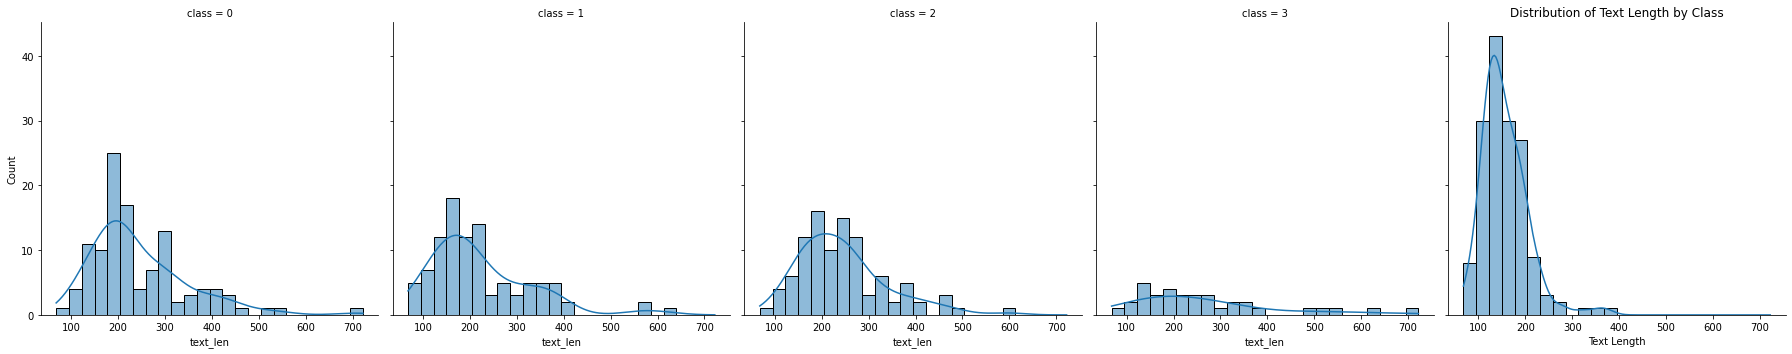

In [46]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 'text' 열의 길이를 계산하여 'text_len' 열을 추가합니다.
test_df['text_len'] = test_df['text'].str.len()

# seaborn displot을 사용하여 밀집도 그래프와 히스토그램을 동시에 그립니다.
sns.displot(
    x="text_len",
    col="class",
    data=test_df,
    kind="hist",
    kde=True,
    fill=True,
    legend=True
)

# x축 레이블 설정 (필요에 따라 조정하세요)
plt.xlabel("Text Length")

# y축 레이블 설정 (필요에 따라 조정하세요)
plt.ylabel("Density")

# 제목 설정 (필요에 따라 조정하세요)
plt.title("Distribution of Text Length by Class")

# 그래프 표시
plt.show()

1. batch_size 
2. 데이터 크기 일반과 동일하게 해보기
3. truncate 250
